In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
study=pd.read_csv('C:/Users/kalya/Documents/PycharmProjects/FeatureEngineering/study_performance3.csv')
study.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [108]:
study.shape

(1000, 8)

In [109]:
study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [110]:
study.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [111]:
study.columns


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [112]:
for col in study.columns:
    print(col,study[col].isnull().sum())

gender 0
race_ethnicity 0
parental_level_of_education 0
lunch 0
test_preparation_course 0
math_score 0
reading_score 0
writing_score 0


## Dealing with Numerical Variables

## Math score

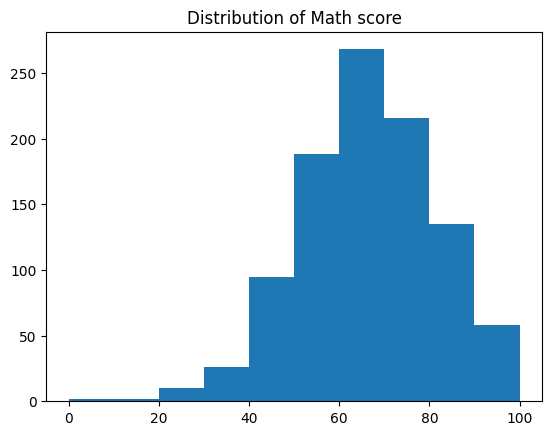

In [113]:
plt.hist(x='math_score',data=study)
plt.title('Distribution of Math score')
plt.show()

## reading_score

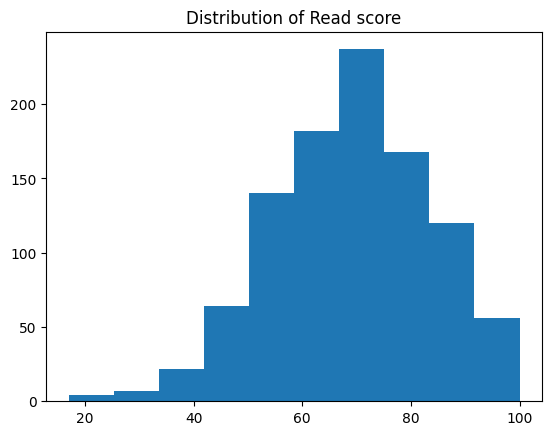

In [114]:
plt.hist(x='reading_score',data=study)
plt.title('Distribution of Read score')
plt.show()

## writing_score

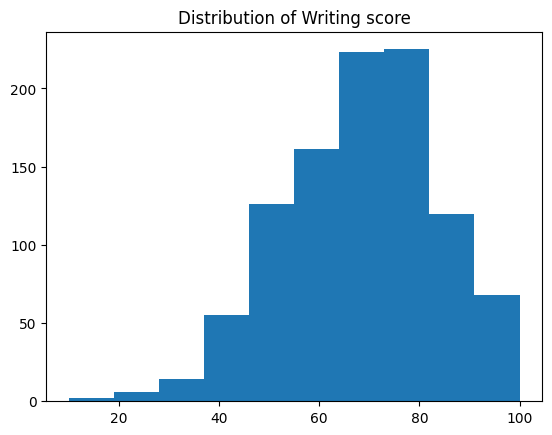

In [115]:
plt.hist(x='writing_score',data=study)
plt.title('Distribution of Writing score')
plt.show()

## Categorical Variables

In [116]:
study['gender'].unique()

array(['female', 'male'], dtype=object)

In [117]:
study['gender']=study['gender'].map({'male':1,'female':0})

In [118]:
study['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [119]:
ohe=pd.get_dummies(study['race_ethnicity'])

In [120]:
study=study.join(ohe)

In [121]:
study.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,group A,group B,group C,group D,group E
0,0,group B,bachelor's degree,standard,none,72,72,74,False,True,False,False,False
1,0,group C,some college,standard,completed,69,90,88,False,False,True,False,False
2,0,group B,master's degree,standard,none,90,95,93,False,True,False,False,False
3,1,group A,associate's degree,free/reduced,none,47,57,44,True,False,False,False,False
4,1,group C,some college,standard,none,76,78,75,False,False,True,False,False


In [122]:
study['race_ethnicity'].isnull().any()

False

In [123]:
groups=['group A','group B','group C','group D','group E']

In [124]:
dic={True:1,False:0}
for i in groups:
    study[i]=study[i].map(dic)
    study[i]=study[i].astype('int64')

In [125]:
study.dtypes

gender                          int64
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
group A                         int64
group B                         int64
group C                         int64
group D                         int64
group E                         int64
dtype: object

In [126]:
study['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [127]:
study['parental_level_of_education']=study['parental_level_of_education'].astype('category')

In [128]:
study['parental_level_of_encoded']=study['parental_level_of_education'].cat.codes

In [129]:
study['parental_level_of_encoded'].unique()

array([1, 4, 3, 0, 2, 5], dtype=int8)

In [130]:
study['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [131]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
study['encoded_lunch']=encoder.fit_transform(study['lunch'])

In [132]:
name_mapping = dict(zip(tuple(list(study['lunch'])), tuple(list(study['encoded_lunch']))))
print(name_mapping)

{'standard': 1, 'free/reduced': 0}


In [133]:
study.dtypes

gender                            int64
race_ethnicity                   object
parental_level_of_education    category
lunch                            object
test_preparation_course          object
math_score                        int64
reading_score                     int64
writing_score                     int64
group A                           int64
group B                           int64
group C                           int64
group D                           int64
group E                           int64
parental_level_of_encoded          int8
encoded_lunch                     int32
dtype: object

In [134]:
study['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

In [135]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
study['test_course']=encoder.fit_transform(study['test_preparation_course'])

In [136]:
name_mapping_test = dict(zip(tuple(list(study['test_preparation_course'])), tuple(list(study['test_course']))))
print(name_mapping_test)

{'none': 1, 'completed': 0}


In [137]:
study.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,group A,group B,group C,group D,group E,parental_level_of_encoded,encoded_lunch,test_course
0,0,group B,bachelor's degree,standard,none,72,72,74,0,1,0,0,0,1,1,1
1,0,group C,some college,standard,completed,69,90,88,0,0,1,0,0,4,1,0
2,0,group B,master's degree,standard,none,90,95,93,0,1,0,0,0,3,1,1
3,1,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,0,0,0,0,1
4,1,group C,some college,standard,none,76,78,75,0,0,1,0,0,4,1,1


In [138]:
study.dtypes

gender                            int64
race_ethnicity                   object
parental_level_of_education    category
lunch                            object
test_preparation_course          object
math_score                        int64
reading_score                     int64
writing_score                     int64
group A                           int64
group B                           int64
group C                           int64
group D                           int64
group E                           int64
parental_level_of_encoded          int8
encoded_lunch                     int32
test_course                       int32
dtype: object

In [139]:
study.shape

(1000, 16)

## FEATURE ENGG is also done , lets visualize it

## UNIVARIATE ANALYSIS

In [140]:
study.gender.value_counts()  ## more females than male

gender
0    518
1    482
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

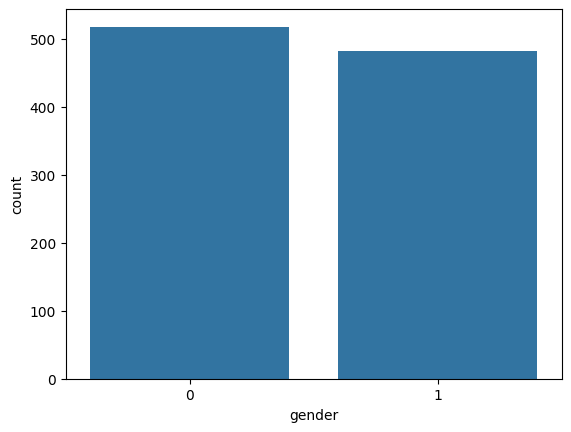

In [141]:
sns.countplot(x='gender',data=study)
plt.show  #female students are bit more than the male students in dataframe

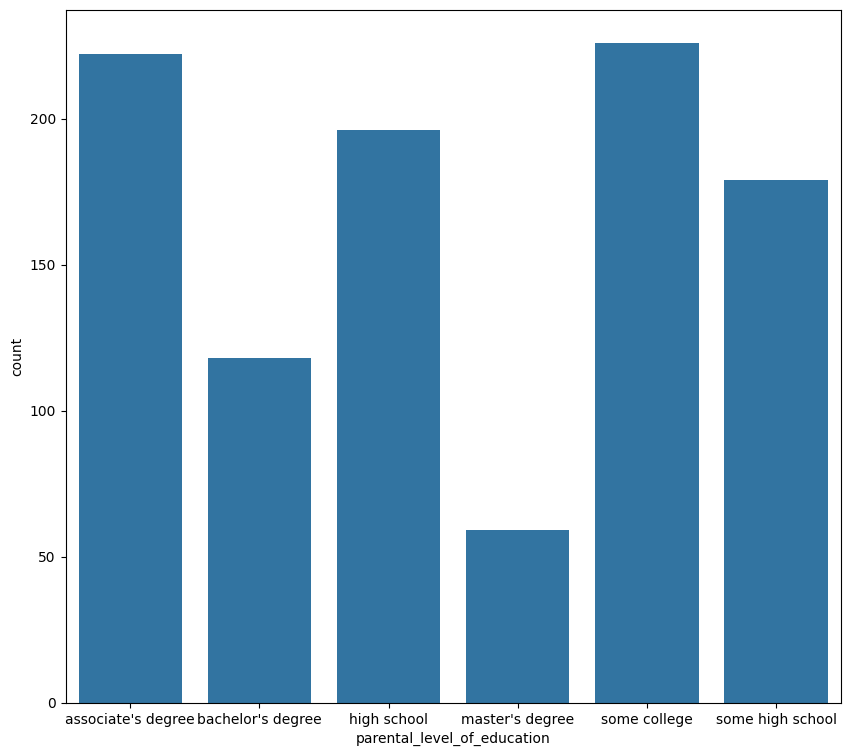

In [142]:
plt.figure(figsize=(10,9))
sns.countplot(x='parental_level_of_education',data=study)
plt.show()

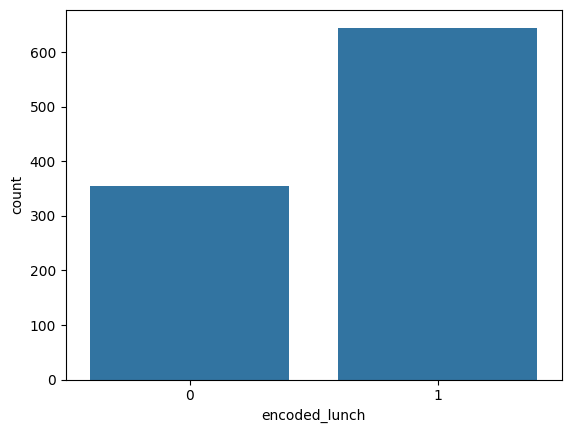

In [143]:
sns.countplot(x='encoded_lunch',data=study)
plt.show()  # standard lunch is opted by many students

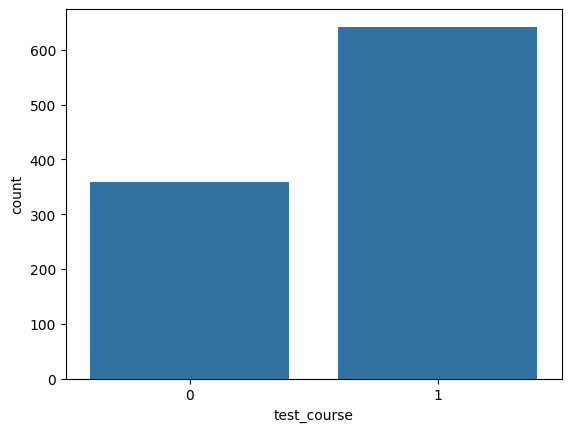

In [144]:
sns.countplot(x='test_course',data=study) # 0 means completed and 1 means none acc to labelencoder
plt.show()   # many didnt complete the prep test course as per plot

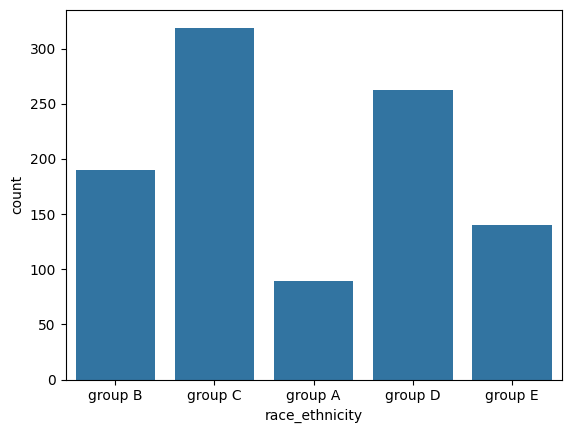

In [145]:
sns.countplot(x='race_ethnicity',data=study) #group C and D are quite large in number
plt.show()

## BIVARIATE ANALYSIS

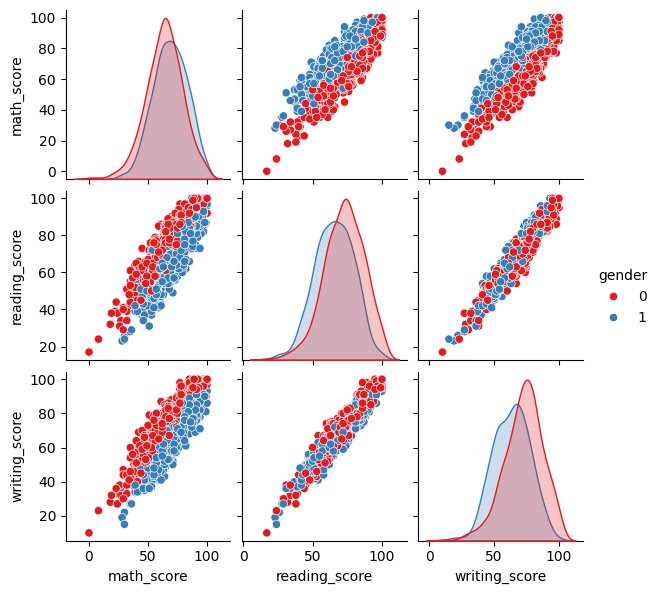

In [146]:
sns.pairplot(study[['gender','math_score','reading_score','writing_score']],hue='gender',palette='Set1',diag_kind='kde',height=2)
plt.show()

In [147]:
#observations:1. male are doing good at math slightly, male gud at reading and writing, the height scored by females mostly
#reading and writing is equally good by both boys and girls
#math compared to reading /writing, male gud at math
#reading/writing comapred with math, girls are good at reading and writing

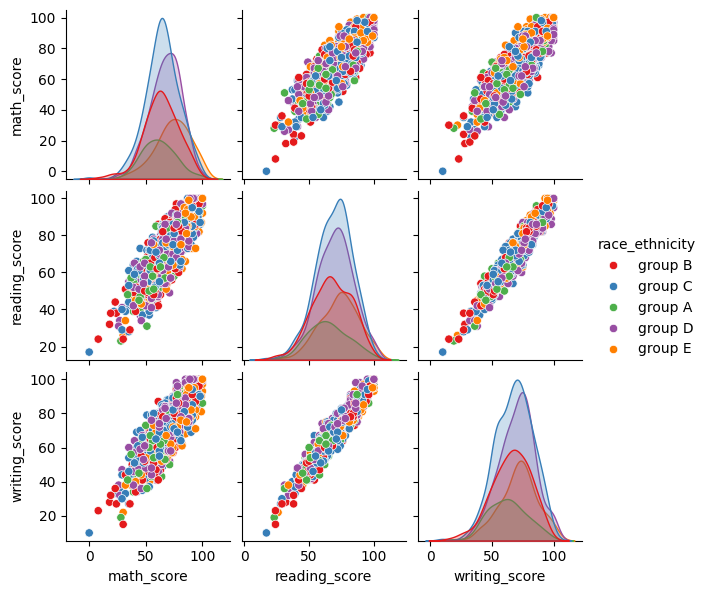

In [148]:
sns.pairplot(study[['race_ethnicity','math_score','reading_score','writing_score']],hue='race_ethnicity',palette='Set1',diag_kind='kde',height=2)
plt.show()

In [149]:
study['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

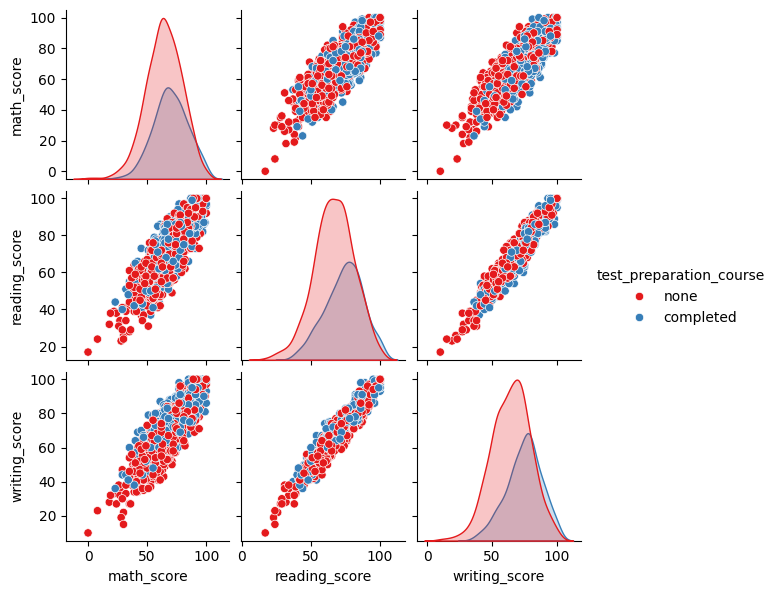

In [150]:
sns.pairplot(study[['test_preparation_course','math_score','reading_score','writing_score']],hue='test_preparation_course',
             palette='Set1',diag_kind='kde',height=2)
plt.show()

In [151]:
study['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

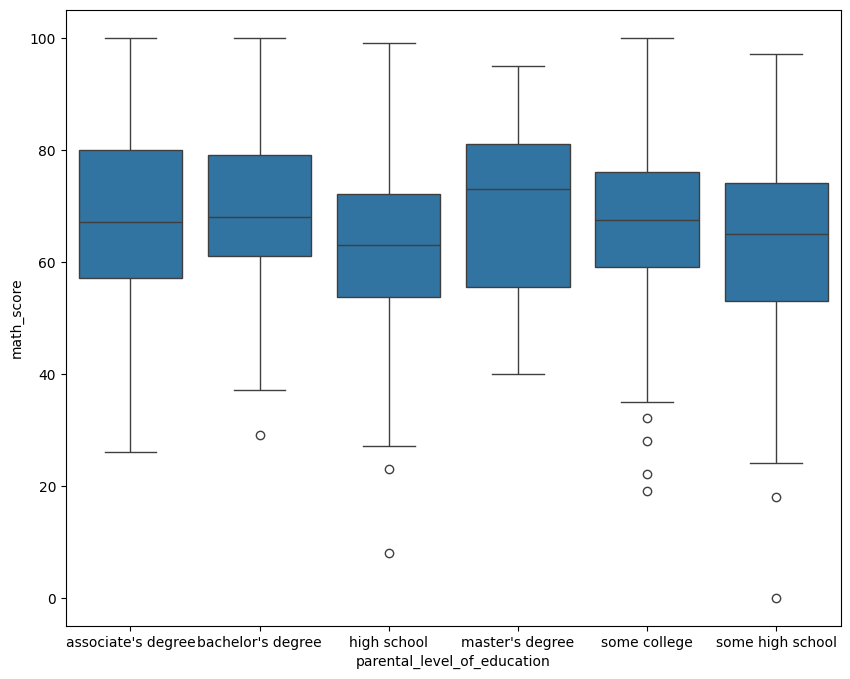

In [152]:
plt.figure(figsize=(10,8))
sns.boxplot(x='parental_level_of_education',y='math_score',data=study)
plt.show()  #parents who studied masters, thier kids scored good math score

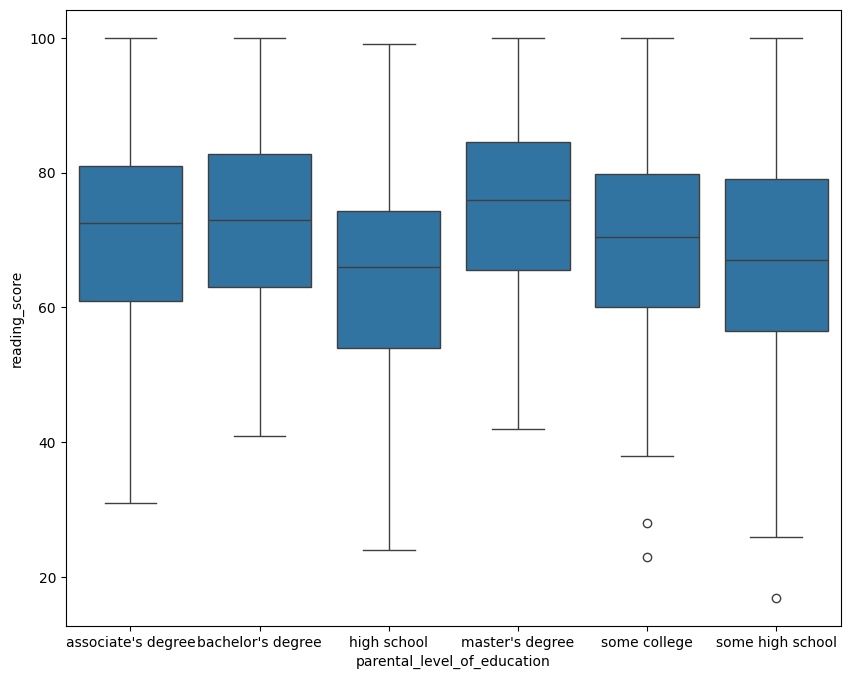

In [153]:
plt.figure(figsize=(10,8))
sns.boxplot(x='parental_level_of_education',y='reading_score',data=study)
plt.show()  #parents who studied masters, thier kids scored good math score

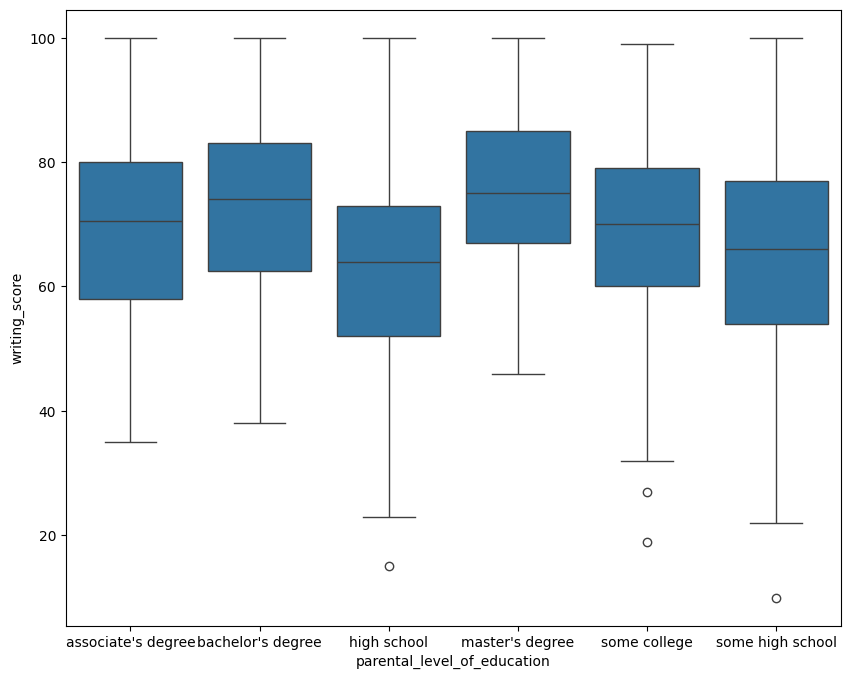

In [154]:
plt.figure(figsize=(10,8))
sns.boxplot(x='parental_level_of_education',y='writing_score',data=study)
plt.show()  #parents who studied masters, thier kids scored good math score

In [155]:
#Observations:
#parents who did masters, their kids scored higher followed by associate and bachelors
#parents who did high school, some college , hs lot of outliers plus theier avaerage score is little low

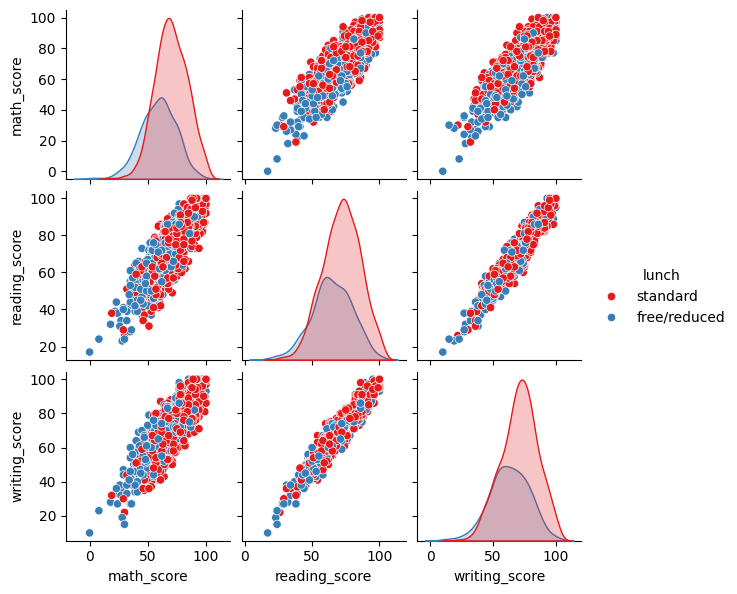

In [156]:
sns.pairplot(study[['lunch','math_score','reading_score','writing_score']],hue='lunch',
             palette='Set1',diag_kind='kde',height=2)
plt.show()

In [157]:
#those who eat standard lunch score much higher

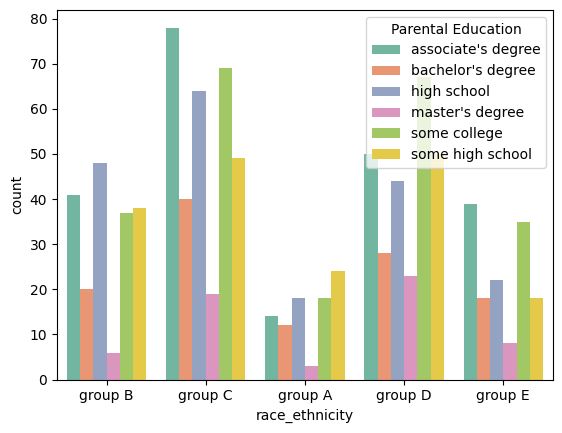

In [158]:
sns.countplot(x='race_ethnicity', hue='parental_level_of_education', data=study, palette='Set2')
plt.legend(title='Parental Education')
plt.show()

In [159]:
#group a and b race has more high schoolers, they are less educated when compared to other groups

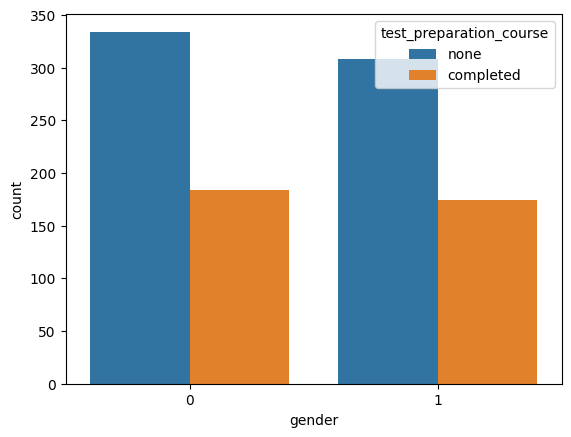

In [160]:
sns.countplot(x='gender',hue='test_preparation_course',data=study)
plt.show()

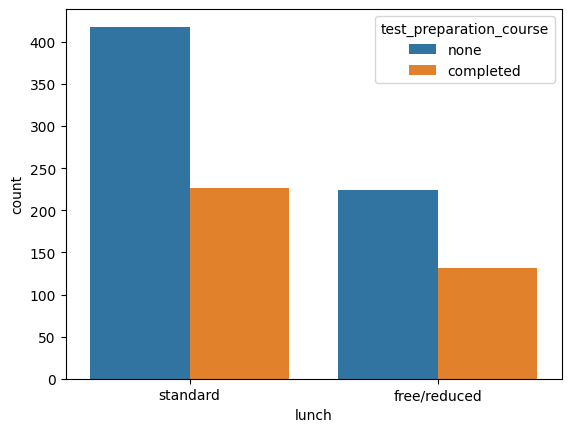

In [161]:
sns.countplot(x='lunch',hue='test_preparation_course',data=study)
plt.show()

## Scaling the scores of diff subjects

In [162]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
study['math_scaled']=scaler.fit_transform(study[['math_score']])
study['read_scaled']=scaler.fit_transform(study[['reading_score']])
study['write_scaled']=scaler.fit_transform(study[['writing_score']])

In [163]:
study.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,group A,group B,group C,group D,group E,parental_level_of_encoded,encoded_lunch,test_course,math_scaled,read_scaled,write_scaled
0,0,group B,bachelor's degree,standard,none,72,72,74,0,1,0,0,0,1,1,1,0.72,0.662651,0.711111
1,0,group C,some college,standard,completed,69,90,88,0,0,1,0,0,4,1,0,0.69,0.879518,0.866667
2,0,group B,master's degree,standard,none,90,95,93,0,1,0,0,0,3,1,1,0.90,0.939759,0.922222
3,1,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,0,0,0,0,1,0.47,0.481928,0.377778
4,1,group C,some college,standard,none,76,78,75,0,0,1,0,0,4,1,1,0.76,0.734940,0.722222


In [164]:
drop_columns=['parental_level_of_education','math_score','reading_score','writing_score','race_ethnicity','lunch','test_preparation_course']
for col in drop_columns:
   study.drop(columns=col,inplace=True)

In [165]:
study.head()

,gender,group A,group B,group C,group D,group E,parental_level_of_encoded,encoded_lunch,test_course,math_scaled,read_scaled,write_scaled
0,0,0,1,0,0,0,1,1,1,0.72,0.662651,0.711111
1,0,0,0,1,0,0,4,1,0,0.69,0.879518,0.866667
2,0,0,1,0,0,0,3,1,1,0.90,0.939759,0.922222
3,1,1,0,0,0,0,0,0,1,0.47,0.481928,0.377778
4,1,0,0,1,0,0,4,1,1,0.76,0.734940,0.722222


# 

In [191]:
desired_columns=list(study.columns.drop('math_scaled'))+['math_scaled']
study=study.reindex(columns=desired_columns)

In [192]:
study.head(2)

,gender,group A,group B,group C,group D,group E,parental_level_of_encoded,encoded_lunch,test_course,read_scaled,write_scaled,math_scaled
0,0,0,1,0,0,0,1,1,1,0.662651,0.711111,0.72
1,0,0,0,1,0,0,4,1,0,0.879518,0.866667,0.69


In [193]:
X=study.iloc[:,:-1].values
y=study.iloc[:,-1].values

In [194]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [195]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)




LinearRegression()

In [196]:
# Inverse scaling to get unscaled values
y_pred_unscaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

# Print predicted and actual unscaled values side by side
np.set_printoptions(precision=2)  # Set precision for better readability
comparison = np.concatenate((y_pred_unscaled.reshape(-1, 1), y_test_unscaled.reshape(-1, 1)), axis=1)
print(comparison)

[[ 66.27  65.8 ]
 [ 76.89  88.3 ]
 [ 53.46  46.  ]
 [ 69.81  79.3 ]
 [ 72.73  72.1 ]
 [ 75.55  80.2 ]
 [ 69.07  70.3 ]
 [ 53.55  51.4 ]
 [ 91.39  99.1 ]
 [ 47.82  51.4 ]
 [ 50.08  58.6 ]
 [ 63.8   57.7 ]
 [ 83.23  91.9 ]
 [ 86.56  85.6 ]
 [ 50.36  53.2 ]
 [ 39.39  39.7 ]
 [ 61.38  61.3 ]
 [ 79.5   82.9 ]
 [ 54.71  55.  ]
 [ 83.47  82.  ]
 [ 60.76  66.7 ]
 [ 51.66  56.8 ]
 [ 74.42  75.7 ]
 [ 68.06  69.4 ]
 [ 52.76  59.5 ]
 [ 68.07  71.2 ]
 [ 66.23  68.5 ]
 [ 54.67  64.  ]
 [ 60.5   57.7 ]
 [ 80.03  72.1 ]
 [ 76.08  73.9 ]
 [ 91.3   93.7 ]
 [ 86.11  83.8 ]
 [ 58.93  53.2 ]
 [ 48.31  56.8 ]
 [ 88.71  92.8 ]
 [ 92.94  92.8 ]
 [ 61.47  72.1 ]
 [ 70.85  61.3 ]
 [ 71.23  72.1 ]
 [ 74.5   78.4 ]
 [ 62.13  65.8 ]
 [ 75.52  73.9 ]
 [ 70.45  61.3 ]
 [ 75.31  73.9 ]
 [ 55.09  56.8 ]
 [ 83.72  79.3 ]
 [ 58.19  63.1 ]
 [ 79.4   79.3 ]
 [ 56.64  49.6 ]
 [ 47.69  52.3 ]
 [ 67.27  70.3 ]
 [ 47.28  49.6 ]
 [ 65.34  64.9 ]
 [ 44.84  45.1 ]
 [ 68.96  66.7 ]
 [ 51.24  52.3 ]
 [ 70.67  72.1 ]
 [ 85.32  82.9

In [197]:
from sklearn.metrics import mean_squared_error,r2_score
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2 Score):", r2)

Root Mean Squared Error (RMSE): 0.05533816008909455
R-squared (R2 Score): 0.8648592083177586
